In [1]:
from PIL import Image
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import numpy as np
import zipfile
import urllib.request
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
if not os.path.exists("data"):
    print("downloading images")
    urllib.request.urlretrieve("http://bordak.eu/x/files/data.zip", "data.zip")
    print("extracting")
    with zipfile.ZipFile("data.zip","r") as zip_ref:
        zip_ref.extractall("./")
        print("extracted into data")
else:
    print("data already exists")
    
if not os.path.exists("data_multilabel"):
    print("downloading multilabel images")
    urllib.request.urlretrieve("http://bordak.eu/x/files/data_multilabel.zip", "data_multilabel.zip")
    print("extracting")
    with zipfile.ZipFile("data_multilabel.zip","r") as zip_ref:
        zip_ref.extractall("./")
        print("extracted into data_multilabel")
else:
    print("data_multilabel already exists")


data already exists
data_multilabel already exists


In [3]:
img_height = 299
img_width = 299

train_data_dir = 'data/train'
test_data_dir = 'data/test'
validation_data_dir = 'data/validation'

nb_epochs = 50
nb_train_samples = 256
nb_validation_samples = 64
nb_test_samples = 30


base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adadelta', loss='categorical_crossentropy')



train_datagen = ImageDataGenerator(rescale=1. / 255, rotation_range = 20, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255, rotation_range = 20, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=32,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width),
                                                              batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=32,
                                                  class_mode='categorical', shuffle = False)


def confm(result):
    mx = np.zeros((10,10)).reshape(10,10)
    for i in range(nb_test_samples): #hany kepet generaltunk a bemenetekhez
        for j in range(30): #hany bemenet van
            mx[test_generator.classes[j]][np.argmax(result[i*nb_test_samples+j])] += 1
    
    mydict = test_generator.class_indices
    for i in range(10):
        print(mx[i], list(mydict.keys())[list(mydict.values()).index(i)])

before = model.predict_generator(test_generator, steps=nb_test_samples)
confm(before)

Found 50 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
[  0.   5.  55.   7.   1.   3.   0.  19.   0.   0.] cpu
[  0.   0.  87.   0.   0.   0.   0.   3.   0.   0.] crayon
[  2.   1.  58.   0.  29.   0.   0.   0.   0.   0.] daisy
[  0.   2.  88.   0.   0.   0.   0.   0.   0.   0.] firefighter
[  0.   0.  74.   0.   0.   0.   0.  16.   0.   0.] ladybug
[  0.   0.  90.   0.   0.   0.   0.   0.   0.   0.] lime
[  0.   0.  75.   0.   0.   0.   0.  15.   0.   0.] mango
[ 12.  11.  60.   0.   0.   0.   0.   7.   0.   0.] piano
[  0.   0.  90.   0.   0.   0.   0.   0.   0.   0.] pretzel
[  0.   0.  78.   0.   0.   4.   0.   8.   0.   0.] toothbursh


In [4]:
#model.fit_generator(train_generator, samples_per_epoch=nb_train_samples, nb_epoch=nb_epochs,
#                    validation_data=validation_generator, nb_val_samples=nb_validation_samples)
#model.save_weights("model.h5")
print('done')

Epoch 1/50
8/8 [==============================] - 58s - loss: 1.7136 - val_loss: 1.3620
Epoch 2/50
8/8 [==============================] - 53s - loss: 0.9348 - val_loss: 0.7699
Epoch 3/50
8/8 [==============================] - 53s - loss: 0.2466 - val_loss: 0.3405
Epoch 4/50
8/8 [==============================] - 53s - loss: 0.1267 - val_loss: 0.3713
Epoch 5/50
8/8 [==============================] - 53s - loss: 0.0805 - val_loss: 0.2645
Epoch 6/50
8/8 [==============================] - 53s - loss: 0.0548 - val_loss: 0.2782
Epoch 7/50
8/8 [==============================] - 53s - loss: 0.0433 - val_loss: 0.2526
Epoch 8/50
8/8 [==============================] - 53s - loss: 0.0776 - val_loss: 0.6309
Epoch 9/50
8/8 [==============================] - 53s - loss: 0.0576 - val_loss: 0.2771
Epoch 10/50
8/8 [==============================] - 53s - loss: 0.0543 - val_loss: 0.2402
Epoch 11/50
8/8 [==============================] - 53s - loss: 0.0446 - val_loss: 0.2113
Epoch 12/50
8/8 [=============

In [5]:
model.load_weights("model.h5")
print('done')

done


In [6]:
first_train = model.predict_generator(test_generator, steps=nb_test_samples)
confm(first_train)


[ 90.   0.   0.   0.   0.   0.   0.   0.   0.   0.] cpu
[  0.  89.   0.   0.   0.   0.   0.   0.   0.   1.] crayon
[  0.   0.  90.   0.   0.   0.   0.   0.   0.   0.] daisy
[  0.   0.   0.  90.   0.   0.   0.   0.   0.   0.] firefighter
[  0.   0.   0.   0.  90.   0.   0.   0.   0.   0.] ladybug
[  0.   7.   0.   0.   0.  66.   3.   1.   0.  13.] lime
[  0.   1.   0.   0.   0.   0.  89.   0.   0.   0.] mango
[  0.   0.   0.   0.   0.   0.   0.  90.   0.   0.] piano
[  0.   0.   0.   0.   0.   0.   0.   0.  90.   0.] pretzel
[  0.   0.   0.   1.   0.   0.   0.   0.   0.  89.] toothbursh


In [7]:
for layer in model.layers[:172]:
    layer.trainable = False
for layer in model.layers[172:]:
    layer.trainable = True

#model.fit_generator(train_generator, samples_per_epoch=nb_train_samples, nb_epoch=nb_epochs,
#   validation_data=validation_generator, nb_val_samples=nb_validation_samples)
#model.save_weights("model2.h5")
print('done')

Epoch 1/50
8/8 [==============================] - 54s - loss: 8.1572e-04 - val_loss: 0.1367
Epoch 2/50
8/8 [==============================] - 53s - loss: 0.0020 - val_loss: 0.2275
Epoch 3/50
8/8 [==============================] - 53s - loss: 0.0015 - val_loss: 0.1482
Epoch 4/50
8/8 [==============================] - 53s - loss: 5.9009e-04 - val_loss: 0.1273
Epoch 5/50
8/8 [==============================] - 53s - loss: 0.0084 - val_loss: 0.1278
Epoch 6/50
8/8 [==============================] - 53s - loss: 0.0014 - val_loss: 0.1252
Epoch 7/50
8/8 [==============================] - 53s - loss: 0.0019 - val_loss: 0.1504
Epoch 8/50
8/8 [==============================] - 53s - loss: 0.0125 - val_loss: 0.6187
Epoch 9/50
8/8 [==============================] - 53s - loss: 0.0079 - val_loss: 0.1386
Epoch 10/50
8/8 [==============================] - 53s - loss: 0.0032 - val_loss: 0.3974
Epoch 11/50
8/8 [==============================] - 53s - loss: 0.0027 - val_loss: 0.1654
Epoch 12/50
8/8 [=====

In [8]:
model.load_weights("model2.h5")
print('done')

done


In [9]:
second_train = model.predict_generator(test_generator, steps=nb_test_samples)
confm(second_train)

[ 90.   0.   0.   0.   0.   0.   0.   0.   0.   0.] cpu
[  0.  84.   0.   0.   0.   0.   0.   0.   0.   6.] crayon
[  0.   0.  90.   0.   0.   0.   0.   0.   0.   0.] daisy
[  2.   0.   0.  88.   0.   0.   0.   0.   0.   0.] firefighter
[  0.   0.   0.   0.  90.   0.   0.   0.   0.   0.] ladybug
[  0.   0.   0.   0.   0.  79.   5.   0.   0.   6.] lime
[  0.   0.   0.   0.   0.   0.  90.   0.   0.   0.] mango
[  0.   0.   0.   0.   0.   0.   0.  90.   0.   0.] piano
[  0.   0.   0.   0.   0.   0.   0.   0.  90.   0.] pretzel
[  0.   0.   0.   0.   0.   1.   0.   0.   0.  89.] toothbursh


In [10]:
test_data_multilabel_dir = 'data_multilabel/test'
test_datagen = ImageDataGenerator(rescale=1. / 255, rotation_range = 20, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_multilabel_generator = test_datagen.flow_from_directory(test_data_multilabel_dir, target_size=(img_height, img_width), batch_size=32,
                                                  class_mode='categorical', shuffle = False)
multi_predict = model.predict_generator(test_multilabel_generator, steps=1)

Found 1 images belonging to 1 classes.


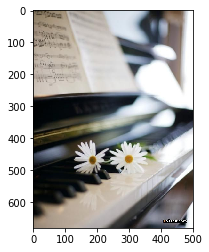

7 	 0.70344 	 piano
2 	 0.118503 	 daisy
9 	 0.0526537 	 toothbursh
5 	 0.0420769 	 lime
3 	 0.0363193 	 firefighter
8 	 0.0280325 	 pretzel
1 	 0.0125564 	 crayon
0 	 0.00393309 	 cpu
4 	 0.00192525 	 ladybug
6 	 0.00056011 	 mango


In [11]:
img=mpimg.imread('data_multilabel/test/valami/3.jpg')
imgplot = plt.imshow(img)
plt.show()
mydict = test_generator.class_indices
st = sorted(range(len(multi_predict[0])), key=lambda k: multi_predict[0][k], reverse=True)
for i in st:
    print(i, "\t", multi_predict[0][i],"\t" ,list(mydict.keys())[list(mydict.values()).index(i)])

In [12]:
for i in range(len(base_model.layers)):
    print(i, base_model.layers[i])

0 <keras.engine.topology.InputLayer object at 0x7f0d73be4588>
1 <keras.layers.convolutional.Conv2D object at 0x7f0d73be47f0>
2 <keras.layers.normalization.BatchNormalization object at 0x7f0d73be4630>
3 <keras.layers.core.Activation object at 0x7f0d73be4b38>
4 <keras.layers.convolutional.Conv2D object at 0x7f0d73be4b70>
5 <keras.layers.normalization.BatchNormalization object at 0x7f0d73b9d588>
6 <keras.layers.core.Activation object at 0x7f0d73bb0390>
7 <keras.layers.convolutional.Conv2D object at 0x7f0d73b47e48>
8 <keras.layers.normalization.BatchNormalization object at 0x7f0d73b6a198>
9 <keras.layers.core.Activation object at 0x7f0d73b24320>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f0d73b38dd8>
11 <keras.layers.convolutional.Conv2D object at 0x7f0d73adbe80>
12 <keras.layers.normalization.BatchNormalization object at 0x7f0d73a80ac8>
13 <keras.layers.core.Activation object at 0x7f0d73aa7cc0>
14 <keras.layers.convolutional.Conv2D object at 0x7f0d73aa7da0>
15 <keras.layers.normal